In [71]:
using DataFrames, CSV, Plots,Statistics, StatsPlots, Distributions, StatsBase, StatsModels, HypothesisTests, LinearAlgebra, StateSpaceModels, Optim, Plots, GLM, PrettyTables

# set up the parameters for plotting: we are having a wide plot

In [89]:
gr(size=(1350,450))

Plots.GRBackend()

# load data

In [3]:
cd("/Users/ning/Documents/Working_Directory/Tex_MD/Teaching/tutorial/6003/W7")

In [4]:
df = CSV.read("cons_conf.csv", DataFrame);

In [5]:
first(df, 5)

,month,conf
,String7,Float64
1,1978m1,83.7
2,1978m2,84.3
3,1978m3,78.8
4,1978m4,81.6
5,1978m5,82.9


# important!!! : rename the variable "conf" as "y"

In [26]:
df = select(df, "conf" => "y");
first(df, 5)

,y
,Float64
1,83.7
2,84.3
3,78.8
4,81.6
5,82.9


# run the following function for the HEGY12 test

In [27]:
function HEGY12(df)

    r32 = sqrt(3)/2
    r3  = sqrt(3)

    df[:,:y1] = lag(df[:,:y],1) + lag(df[:,:y],2) + lag(df[:,:y],3) + lag(df[:,:y],4) + lag(df[:,:y],5) +
                lag(df[:,:y],6) + lag(df[:,:y],7) + lag(df[:,:y],8) + lag(df[:,:y],9) + lag(df[:,:y],10) + 
                lag(df[:,:y],11) + lag(df[:,:y],12)

    df[:,:y2] = -1 * lag(df[:,:y],1) + lag(df[:,:y],2)  - lag(df[:,:y],3) + lag(df[:,:y],4) - lag(df[:,:y],5) + 
                lag(df[:,:y],6) - lag(df[:,:y],7)+ lag(df[:,:y],8)  - lag(df[:,:y],9) + lag(df[:,:y],10) - 
                lag(df[:,:y],11) + lag(df[:,:y],12)

    df[:,:y3] = -1 * lag(df[:,:y],2) + lag(df[:,:y],4)  - lag(df[:,:y],6) + lag(df[:,:y],8) - 
                lag(df[:,:y],10) + lag(df[:,:y],12)

    df[:,:y4] = -1 * lag(df[:,:y],1) + lag(df[:,:y],3) - lag(df[:,:y],5) + lag(df[:,:y],7) - 
                lag(df[:,:y],9) + lag(df[:,:y],11)

    df[:,:y5] = -0.5 * (lag(df[:,:y],1)  + lag(df[:,:y],2)  - 2 * lag(df[:,:y],3)
                     + lag(df[:,:y],4)  + lag(df[:,:y],5)  - 2 * lag(df[:,:y],6)
                     + lag(df[:,:y],7)  + lag(df[:,:y],8)  - 2 * lag(df[:,:y],9)
                     + lag(df[:,:y],10) + lag(df[:,:y],11) - 2 * lag(df[:,:y],12))

    df[:,:y6] = r32 * (lag(df[:,:y],1)  - lag(df[:,:y],2) 
                    + lag(df[:,:y],4)  - lag(df[:,:y],5) 
                    + lag(df[:,:y],7)  - lag(df[:,:y],8) 
                    + lag(df[:,:y],10) - lag(df[:,:y],11))

    df[:,:y7] = 0.5 * (lag(df[:,:y],1)  - lag(df[:,:y],2)  - 2 * lag(df[:,:y],3)
                    - lag(df[:,:y],4)  + lag(df[:,:y],5)  + 2 * lag(df[:,:y],6)
                    + lag(df[:,:y],7)  - lag(df[:,:y],8)  - 2 * lag(df[:,:y],9)
                    - lag(df[:,:y],10) + lag(df[:,:y],11) + 2 * lag(df[:,:y],12))

    df[:,:y8] = -1 * r32 * (lag(df[:,:y],1) + lag(df[:,:y],2) 
                        - lag(df[:,:y],4)  - lag(df[:,:y],5) 
                        + lag(df[:,:y],7)  + lag(df[:,:y],8) 
                        - lag(df[:,:y],10) - lag(df[:,:y],11))

    df[:,:y9] = -0.5 * (r3 * lag(df[:,:y],1)  - lag(df[:,:y],2) + lag(df[:,:y],4)  - r3 * lag(df[:,:y],5) + 
                2 * lag(df[:,:y],6) - r3 * lag(df[:,:y],7)  + lag(df[:,:y],8) - lag(df[:,:y],10) + 
                r3 * lag(df[:,:y],11) - 2 * lag(df[:,:y],12))

    df[:,:y10] = 0.5 * (lag(df[:,:y],1) - r3 * lag(df[:,:y],2)  + 2 * lag(df[:,:y],3) - r3 * lag(df[:,:y],4) + 
                lag(df[:,:y],5) - lag(df[:,:y],7) + r3 * lag(df[:,:y],8) - 2 * lag(df[:,:y],9) + r3 * lag(df[:,:y],10) -
                lag(df[:,:y],11))

    df[:,:y11] = 0.5 * (r3 * lag(df[:,:y],1) + lag(df[:,:y],2) - lag(df[:,:y],4)  - r3 * lag(df[:,:y],5)  - 
                2 * lag(df[:,:y],6) - r3 * lag(df[:,:y],7) - lag(df[:,:y],8) + lag(df[:,:y],10) + 
                r3 * lag(df[:,:y],11) + 2 * lag(df[:,:y],12))

    df[:,:y12] = -0.5 * (lag(df[:,:y],1) + r3 * lag(df[:,:y],2)  + 2 * lag(df[:,:y],3) + r3 * lag(df[:,:y],4) + 
                lag(df[:,:y],5) - lag(df[:,:y],7) - r3 * lag(df[:,:y],8)  - 2 * lag(df[:,:y],9) - 
                r3 * lag(df[:,:y],10) - lag(df[:,:y],11))


    df[:,:y13] = df[:,:y] - lag(df[:,:y],12)


    patn = repeat([1:12;], convert(Int64, ceil(size(df)[1]/12)))

    df[:,:trend] = [1:size(df)[1];]
    df[:,:patn]  = patn[1:size(df)[1]]
    df[:,:seas1] = (df[:,:patn].==1)

    df[:,:seas1_L1]  = lag(df[:,:seas1],1)
    df[:,:seas1_L2]  = lag(df[:,:seas1],2)
    df[:,:seas1_L3]  = lag(df[:,:seas1],3)
    df[:,:seas1_L4]  = lag(df[:,:seas1],4)
    df[:,:seas1_L5]  = lag(df[:,:seas1],5)
    df[:,:seas1_L6]  = lag(df[:,:seas1],6)
    df[:,:seas1_L7]  = lag(df[:,:seas1],7)
    df[:,:seas1_L8]  = lag(df[:,:seas1],8)
    df[:,:seas1_L9]  = lag(df[:,:seas1],9)
    df[:,:seas1_L10] = lag(df[:,:seas1],10)
    df[:,:seas1_L11] = lag(df[:,:seas1],11)

    fm_test = @formula(y13 ~ 1 + y1 + y2 + y3 + y4 + y5 + y6 + y7 + y8 + y9 + y10 + y11 + y12 + seas1_L1 + seas1_L2 + seas1_L3 + seas1_L4 + seas1_L5 + seas1_L6 + seas1_L7 + seas1_L8 + seas1_L9 + seas1_L10 + seas1_L11);

    OLS_test = lm(fm_test, df, dropcollinear=false)
    
    df[:,:pred] = predict(OLS_test, df)

    tPi = [round.(x, digits=3) for x in coeftable(OLS_test).cols[3][2:13]];

    cv = [-3.32,-3.02,-2.76,-2.47,-3.28,-3.01,-2.76,-2.48,-3.83,-3.51,-3.25, -2.95,-2.61,-2.21,-1.85,-1.45,5.27,6.26,7.19, 8.35];

    cv5 = [cv[3-1] ,cv[7-1] ,cv[11-1],cv[15-1],cv[11-1],cv[15-1],cv[11-1],cv[15-1],cv[11-1],cv[15-1],cv[11-1],cv[15-1]];
    
    cv10 = [cv[4-1] , cv[8-1] , cv[12-1], cv[16-1], cv[12-1], cv[16-1], cv[12-1], cv[16-1], cv[12-1], cv[16-1], cv[12-1], cv[16-1]];

    label = ["t[Pi1] ", "t[Pi2] ", "t[Pi3] ", "t[Pi4] ", "t[Pi5] ", "t[Pi6] ", "t[Pi7] ", "t[Pi8] ", "t[Pi9] ", "t[Pi10]", "t[Pi11]", "t[Pi12]"]
    
    result = hcat(label, tPi, cv5, cv10);
    header = (["","stat", "5% critical", "10% critical"])

    println("HEGY Monthly seasonal unit root test \n")
    println("----------------------------------------------------- \n")
    println("degree of freedom  : ", dof_residual(OLS_test), "\n") 
    println("Deterministic variables : Seasonal dummies + constant \n")
    println("----------------------------------------------------- \n")

    pretty_table(result; header = header)

end

HEGY12 (generic function with 1 method)

# compose the function to do (1) the line plot; (2) acf; (3) pacf; (4)ADF test; (5) HEGY12 test

In [51]:
function ac_pac(data, df)

    plot(xlabel="t", legend=false)
    display(plot!(data, color="orangered"))

    acf_gdp  = autocor(data);
    acf2_gdp = acf_gdp.^2;
    pacf_gdp = pacf(data,[1:1:21;]);

    se_acf_gdp = []

    for i in [1:size(acf_gdp)[1];]  
        push!(se_acf_gdp, sqrt((1+2*sum(acf2_gdp[1:i-1]))/size(data)[1]));   
    end

    ub_acf_gdp = se_acf_gdp * quantile(TDist(size(data)[1]-1), 0.975);
    lb_acf_gdp = se_acf_gdp * quantile(TDist(size(data)[1]-1), 0.025);

    ub_pacf_gdp = quantile(TDist(size(data)[1]-1), 0.975) / sqrt(size(data)[1]);
    lb_pacf_gdp = quantile(TDist(size(data)[1]-1), 0.025) / sqrt(size(data)[1]);

    p1 = bar(acf_gdp, title = "ACF", c = "red", legend = :topright, bar_width = 0.2)
    p1 = plot!(zeros(size(acf_gdp)[1]), ribbon = (ub_acf_gdp .- lb_acf_gdp)./2 , fillalpha = 0.35, c = 1, lw = 2)

    p2 = bar(pacf_gdp, title = "PACF", c = "red", legend = false, bar_width = 0.2)
    p2 = plot!(zeros(size(acf_gdp)[1]), ribbon = (ub_pacf_gdp .- lb_pacf_gdp)./2 , fillalpha = 0.35, c = 1, lw = 2)

    display(plot(p1, p2, layout = (2, 1), legend = false))

    println(ADFTest(data, Symbol("trend"), 3))
    
    println("------------------------------------- \n")

    println(HEGY12(df))

end

ac_pac (generic function with 2 methods)

# check conf

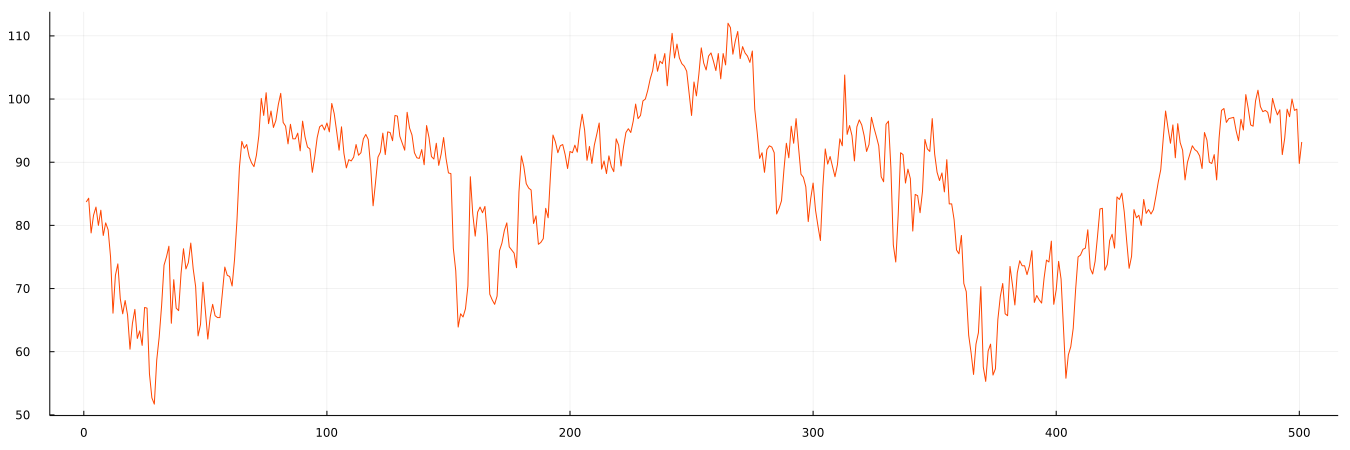

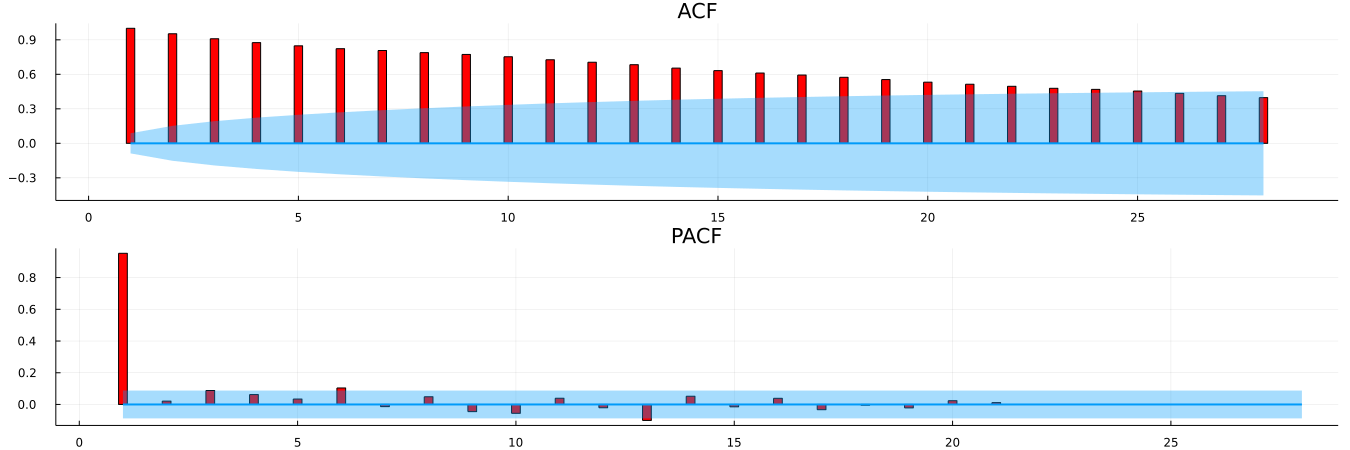

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.040012

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.1885

Details:
    sample size in regression:          497
    number of lags:                     3
    ADF statistic:                      -2.82331
    Critical values at 1%, 5%, and 10%: [-3.97695 -3.41929 -3.13223]

------------------------------------- 

HEGY Monthly seasonal unit root test 

----------------------------------------------------- 

degree of freedom  : 465.0

Deterministic variables : Seasonal dummies + constant 

----------------------------------------------------- 

┌─────────┬─────────┬─────────────┬──────────────┐
│         │    stat │ 5% critical │ 10% critical │
├─────────┼─────────┼─────────────┼──────────────┤
│ t[Pi

In [90]:
ac_pac(df.y, df)

## we saw three nonrejections (Pi1, Pi10, Pi6 since the t value for these 3 period is larger than the 5% critical value). That's surprising (I personally expect much more).

## Each of these nonrejections says "there is a unit root here that we cannot reject", implying that the seasonal differencing is necessary.

---

# test seasonal differencing of conf



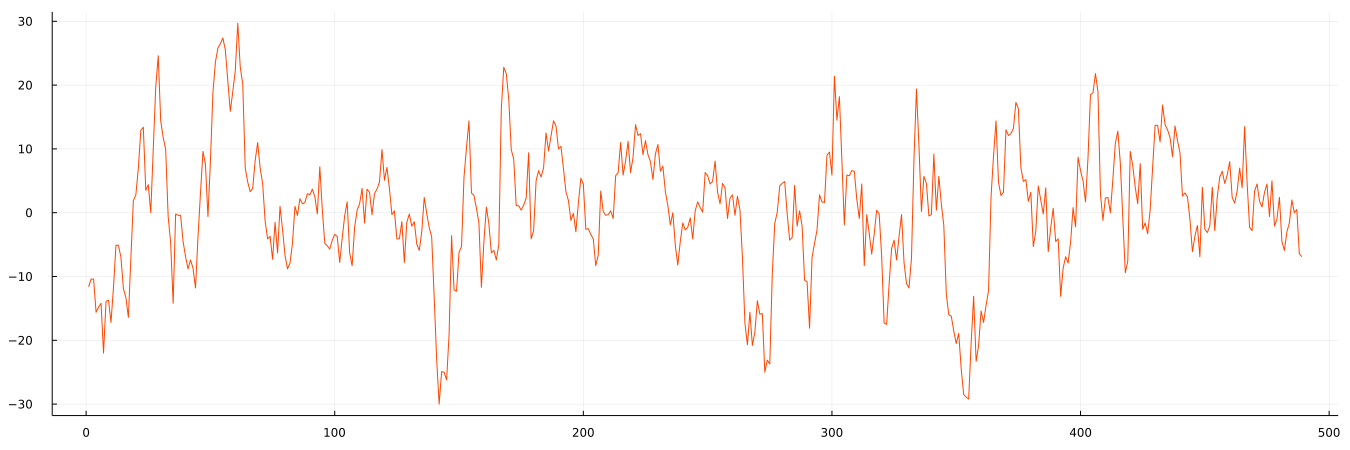

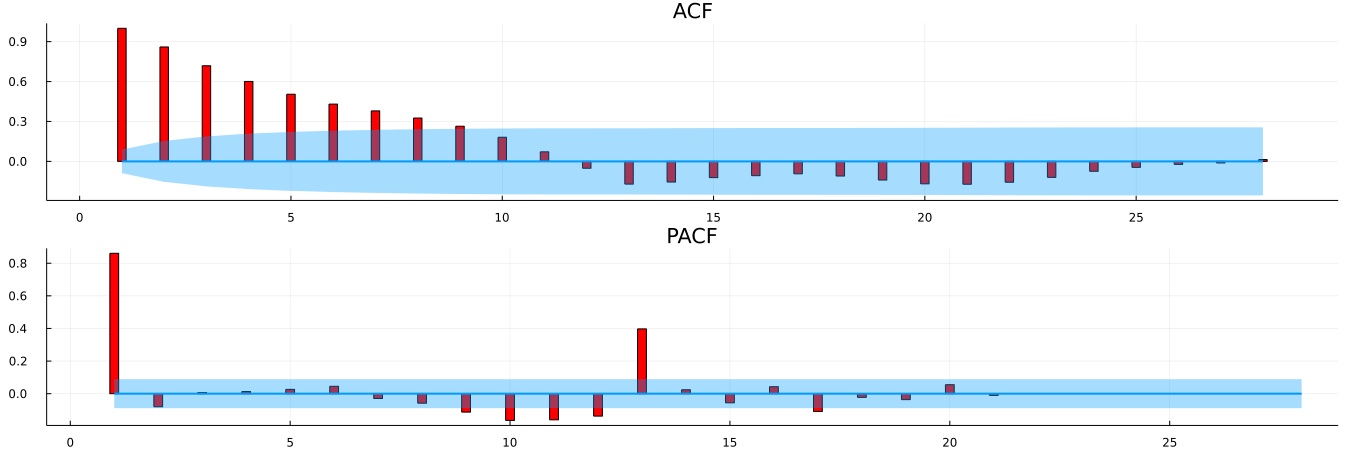

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.149509

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-05

Details:
    sample size in regression:          485
    number of lags:                     3
    ADF statistic:                      -5.79568
    Critical values at 1%, 5%, and 10%: [-3.9774 -3.41951 -3.13235]

------------------------------------- 

HEGY Monthly seasonal unit root test 

----------------------------------------------------- 

degree of freedom  : 453.0

Deterministic variables : Seasonal dummies + constant 

----------------------------------------------------- 

┌─────────┬─────────┬─────────────┬──────────────┐
│         │    stat │ 5% critical │ 10% critical │
├─────────┼─────────┼─────────────┼──────────────┤
│ t[Pi1]  │  -7

In [91]:
df1 = DataFrame(y=df[:,:y]- lag(df[:,:y],12));
df1 = dropmissing(df1)
ac_pac(df1.y, df1)

## We reduce 3 non-rejections to 2. So D=1 is necessary. If you keep differencing, things do not get better at all; you will just waste another 12 degrees of freedom. So we stop at D=1.

---

# keep differencing

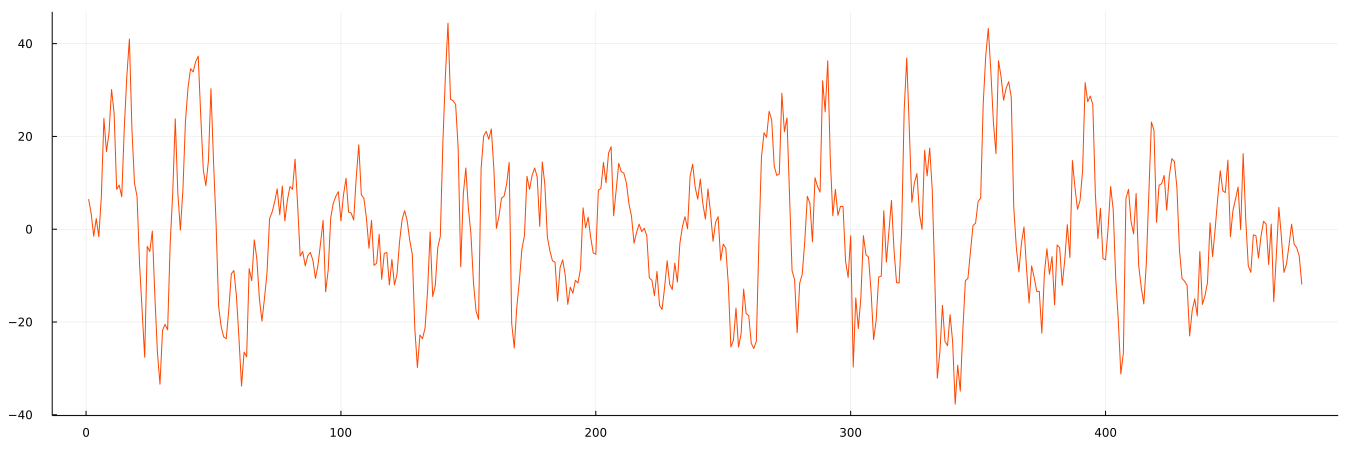

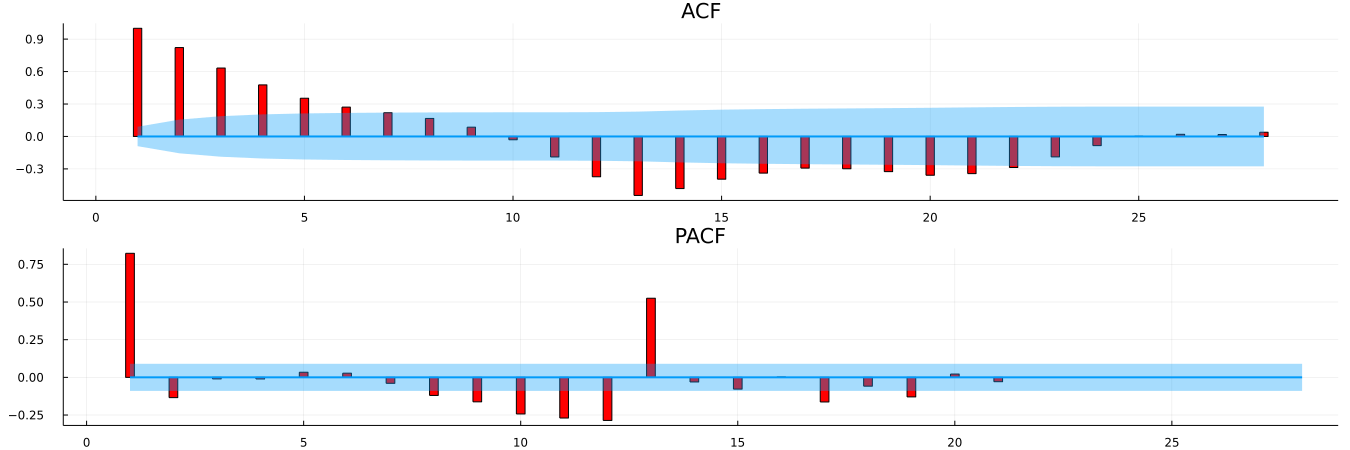

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.205519

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-07

Details:
    sample size in regression:          473
    number of lags:                     3
    ADF statistic:                      -6.76477
    Critical values at 1%, 5%, and 10%: [-3.97788 -3.41973 -3.13249]

------------------------------------- 

HEGY Monthly seasonal unit root test 

----------------------------------------------------- 

degree of freedom  : 441.0

Deterministic variables : Seasonal dummies + constant 

----------------------------------------------------- 

┌─────────┬─────────┬─────────────┬──────────────┐
│         │    stat │ 5% critical │ 10% critical │
├─────────┼─────────┼─────────────┼──────────────┤
│ t[Pi1]  │ -1

In [92]:
df2 = DataFrame(y=df1[:,:y]- lag(df1[:,:y],12));
df2 = dropmissing(df2)
ac_pac(df2.y, df2)

---

# ADF is also happy; so we can use d=0, D=1.

## After differencing, it seems closer to stationary, and there seems to be some autoregressive pattern in the data. Let's check ACF and PACF

## step 1, since we need to plot ACF and PACF of a process hundreds of times, let's write a function in stata to plot ACF and PACF altogether concisely.

## ACF decays and PACF is strong at lag 1, 13 and other seasonal frequencies. so p=P=1 , q=Q=0 could be a place to start 

In [78]:
M1 = SARIMA(df.y; order = (0, 0, 0), seasonal_order = (0, 1, 0, 12), include_mean=true);
StateSpaceModels.fit!(M1);

# ARIMA table

In [79]:
results(M1)

                             Results                           
Model:                        SARIMA(0, 0, 0)x(0, 1, 0, 12) with non-zero mean
Number of observations:       501
Number of unknown parameters: 2
Log-likelihood:               -1817.4673
AIC:                          3638.9345
AICc:                         3638.9586
BIC:                          3647.3678
---------------------------------------------------------------
Parameter      Estimate      Std.Error      z stat      p-value
mean             0.3453         0.0000         Inf           - 
sigma2_η        99.0166        50.7360      1.9516       0.0557


# forecast plot

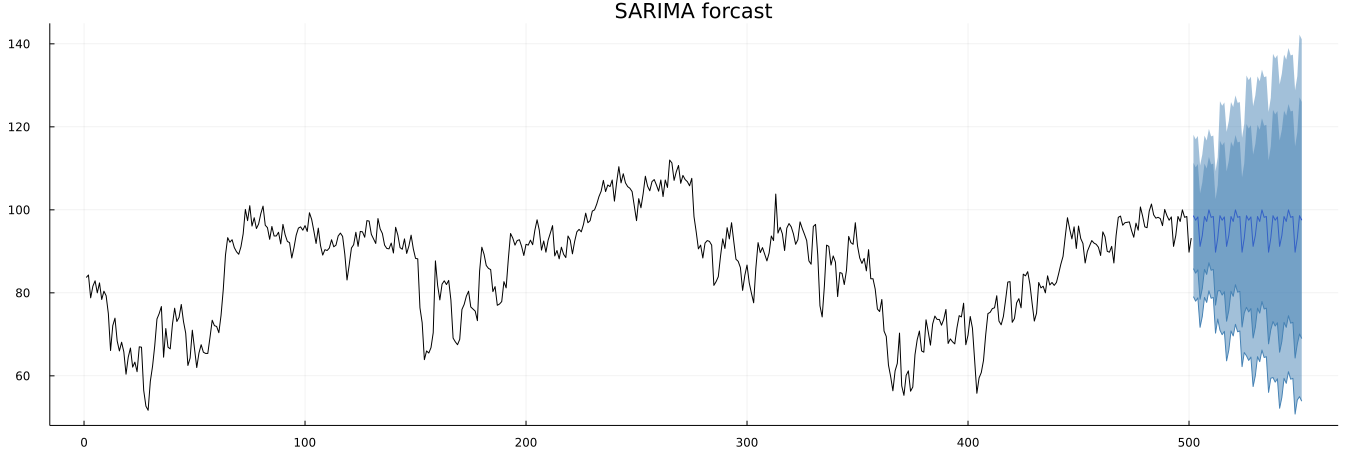

In [93]:
M1_forcast = forecast(M1, 50);
plot(M1, M1_forcast; title = "SARIMA forcast", label = "")

# now, let's use the "auto_arima" function to find the optimal ARIMA setting

# we set the max values of both p and q to be 7

In [84]:
M2 = auto_arima(df.y, max_p=7, max_q=7, max_P=7, max_Q=7, max_d=2, max_D=2, seasonal=12, show_trace=true);
StateSpaceModels.fit!(M2);

Model specification                               Selection metric
SARIMA(2, 1, 2)x(1, 0, 1, 12) with non-zero mean - diverged
SARIMA(0, 1, 0)x(0, 0, 0, 12) with non-zero mean : 2780.429854688048
SARIMA(1, 1, 0)x(1, 0, 0, 12) with non-zero mean : 2778.9985113106463
SARIMA(0, 1, 1)x(0, 0, 1, 12) with non-zero mean : 2779.8848115716414
Search iteration complete: Current best is SARIMA(1, 1, 0)x(1, 0, 0, 12) with non-zero mean
SARIMA(1, 1, 1)x(1, 0, 0, 12) with non-zero mean - diverged
SARIMA(1, 1, 0)x(1, 0, 1, 12) with non-zero mean - diverged
SARIMA(1, 1, 0)x(2, 0, 1, 12) with non-zero mean - diverged
SARIMA(1, 1, 0)x(1, 0, 0, 12) with non-zero mean : 2778.9985113106463
SARIMA(0, 1, 0)x(1, 0, 0, 12) with non-zero mean : 2778.234211112814
SARIMA(0, 1, 1)x(1, 0, 0, 12) with non-zero mean : 2779.392423089819
SARIMA(2, 1, 0)x(1, 0, 0, 12) with non-zero mean : 2775.5816908474935
SARIMA(2, 1, 1)x(1, 0, 0, 12) with non-zero mean : 2773.5234722112464
SARIMA(1, 1, 0)x(0, 0, 0, 12) with non-zero 

# the model selection result returns $(p, d, q) =(3,1,2)$ and $(P, D, Q, M) =(1,0,0,12)$ and the intercept is dropped

In [85]:
results(M2)

                             Results                           
Model:                        SARIMA(3, 1, 2)x(1, 0, 0, 12) with non-zero mean
Number of observations:       501
Number of unknown parameters: 8
Log-likelihood:               -1376.1332
AIC:                          2768.2664
AICc:                         2768.5591
BIC:                          2801.9992
---------------------------------------------------------------
Parameter      Estimate      Std.Error      z stat      p-value
ar_L1            1.8410        14.8318      0.1241       0.9078
ar_L2           -0.9283        60.8630     -0.0153       0.9880
ar_L3            0.0243         1.0886      0.0223       0.9986
ma_L1           -1.9296         4.9645     -0.3887       0.7563
ma_L2            0.9831      7594.8901      0.0001       0.9999
s_ar_L12        -0.0129         0.0056     -2.3058       0.0000
mean             0.0190      3.728E+06      0.0000       1.0000
sigma2_η        14.3089         7.1607      1.9983    

# forecast plot

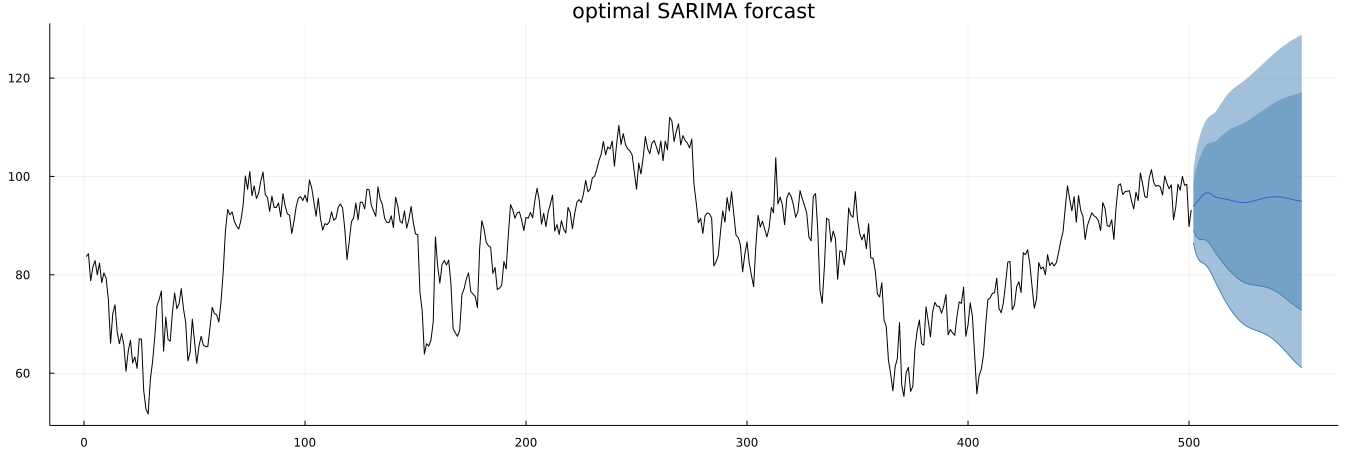

In [94]:
M2_forcast = forecast(M2, 50);
plot(M2, M2_forcast; title = "optimal SARIMA forcast", label = "")

In [95]:
run(`rm -rf W6_Julia_Q4.html`)
run(`jupyter nbconvert --to html W6_Julia_Q4.ipynb`)

[NbConvertApp] Converting notebook W6_Julia_Q4.ipynb to html
[NbConvertApp] Writing 1076319 bytes to W6_Julia_Q4.html


Process(`jupyter nbconvert --to html W6_Julia_Q4.ipynb`, ProcessExited(0))